In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

Its a built in data set in keras : https://keras.io/api/datasets/mnist/

In [92]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [93]:
print("X train shape: ", X_train.shape)
print("y_train shape: " ,y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: " ,y_train.shape)

X train shape:  (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_train shape:  (60000,)


Therefore X_train/X_test is 3d array (60000, 28, 28)

In [94]:
print("Total samples in the dataset",len(X_train))
print("Size of each sample/image",len(X_train[60000-1]))
print("shape of each sample/image",X_train[0].shape)

Total samples in the dataset 60000
Size of each sample/image 28
shape of each sample/image (28, 28)


Analyzing y

In [95]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [96]:
type(y_train)

numpy.ndarray

Therefore , y_train/y_test is just a numpy array which contains the numerical value of corresponding images in X_train/X_test

Viewing images in X

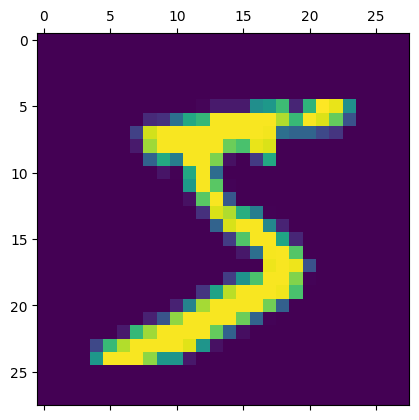

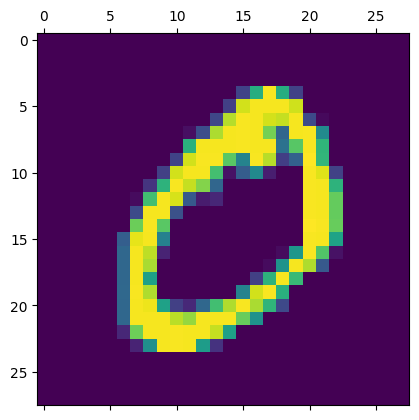

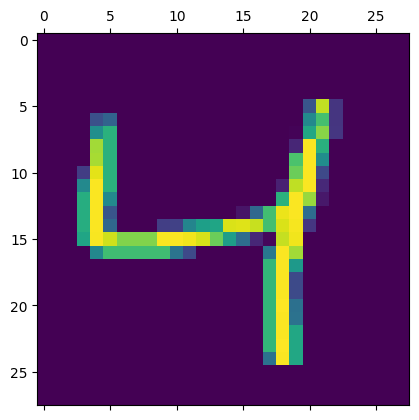

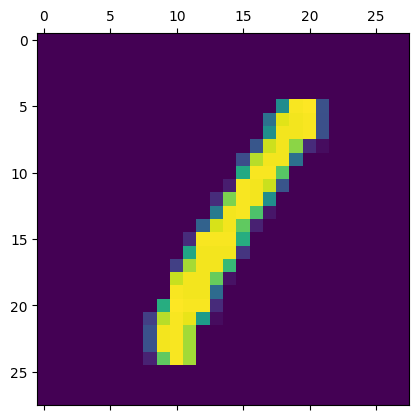

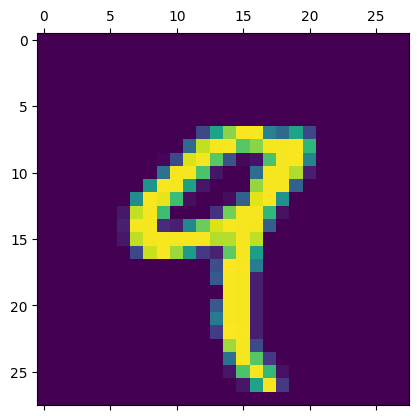

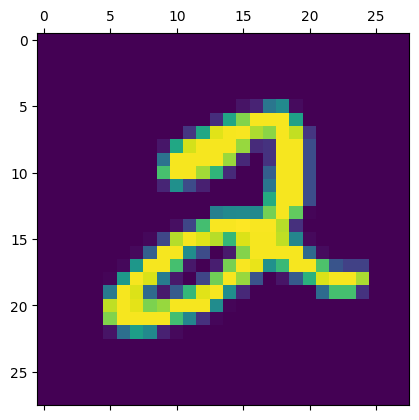

In [97]:
# Viewing first five images
for i in range(0,6):
  plt.matshow(X_train[i])


Scalling training set and bring it between 0 to 1

In [98]:
X_train = X_train/255
X_test = X_test/255

In [99]:
X_test.shape

(10000, 28, 28)

In [100]:
X_train.shape

(60000, 28, 28)

In [101]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Present dimension is 28X28 need to convert it to 784x1/1D to feed in Neural Network

---



In [102]:
## Flattening input data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [103]:
## Manual flattening using pandas
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

print(X_train.shape)
print(X_train_flattened.shape)
print(X_test.shape)
print(X_test_flattened.shape)

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)


In [104]:
# Over here we are using keras builtin flatten method to flatten our data to 28*28
from tensorflow.keras.layers import Flatten

Designing our model

In [124]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [125]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


Training Model

In [126]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [127]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2762 - accuracy: 0.9165 - val_loss: 0.1433 - val_accuracy: 0.9585
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1169 - accuracy: 0.9647 - val_loss: 0.1136 - val_accuracy: 0.9662
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0980 - val_accuracy: 0.9706
Epoch 4/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.1017 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0970 - val_accuracy: 0.9718
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.1040 - val_accuracy: 0.9724
Epoch 7/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0347 - accuracy: 0.9888 - val_loss: 0.1236 - val_accuracy:

In [129]:
y_output=model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [130]:
print(y_output[0])
print(len(y_output[0]))
# Therefore as expected there are 10 outputs and each of them is showing a probability using softmax
# Therefore highest value outof the 10 is the prediction
print(y_output[0].argmax())

# 9.9999982e-01 is in  7th position , 7th position node is nothing but the number 7
# Note : where is it defined that &th umber bode in output layer is 7 and noth something else #

[2.49116927e-26 7.96406940e-14 2.47250400e-15 1.08403220e-09
 1.07904396e-17 1.36504918e-17 2.70979208e-30 9.99999940e-01
 1.19078565e-16 4.79668422e-14]
10
7


In [131]:
y_pred=y_output.argmax(axis=1)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9766

In [134]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

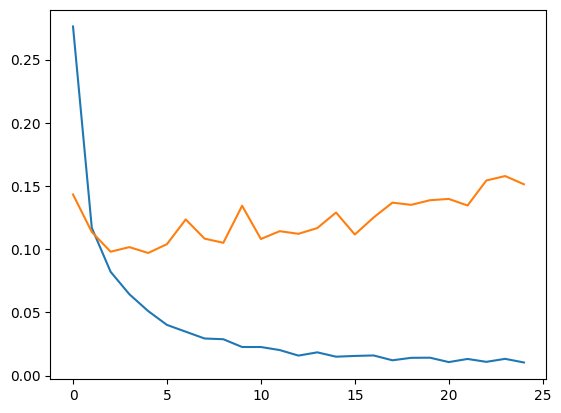

In [136]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

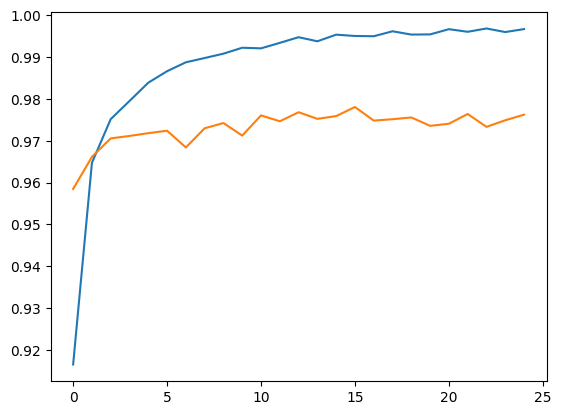

In [137]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])